<a href="https://colab.research.google.com/github/jigarsiddhpura/IMDP-Python-EDA/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/ML-PROJECTS/IMDB-Python-EDA/IMDB-Movie-Data.csv')

### Collecting information about data

In [5]:
df.shape

(1000, 12)

In [6]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [8]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### Data Cleaning

In [9]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<Axes: >

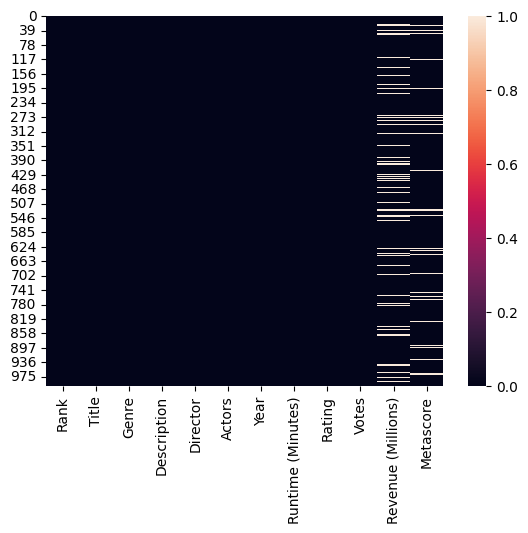

In [10]:
# visualising missing values
sns.heatmap(df.isnull())

In [11]:
# checking how much % of missing values present in dataset
df.isnull().sum() * 100 / len(df)

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

<Axes: xlabel='Revenue (Millions)', ylabel='Count'>

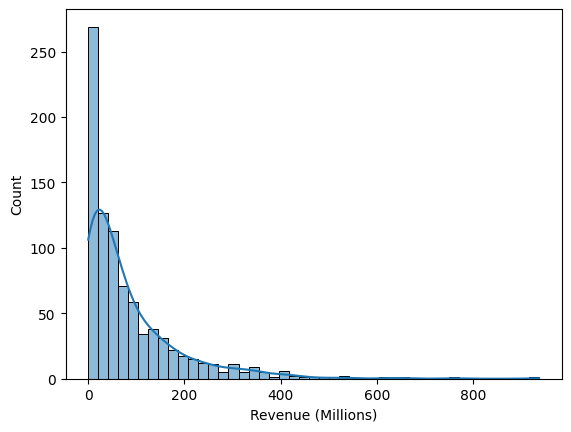

In [12]:
sns.histplot(data=df['Revenue (Millions)'], kde=True)

Since the distribution of Revenue is skewed, we fill missing values with median values

In [13]:
df['Revenue (Millions)'].fillna(value=df['Revenue (Millions)'].median(), inplace=True)

<Axes: xlabel='Metascore', ylabel='Count'>

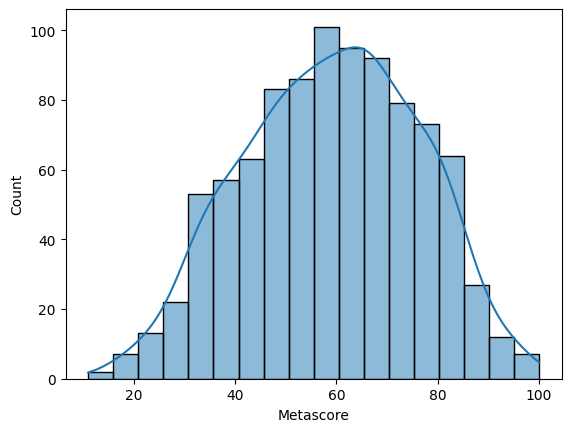

In [14]:
sns.histplot(data=df['Metascore'], kde=True)

Since the distribution of Metascore is normal, we fill missing values with mean values

In [15]:
median = df['Metascore'].median()
df['Metascore'].fillna(value=median,inplace=True)

In [16]:
# checking for duplicate data

df[df.duplicated()]
# df.duplicated().any()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore


### Overall stats of all col (inc. Object dtype)

In [17]:
df.describe(include='all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,78.480040,59.018000
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,97.118097,16.635336
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.750000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,71.000000


### Data Analysis

In [18]:
df[df['Runtime (Minutes)'] >= 180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
828                 Grindhouse
965              Inland Empire
Name: Title, dtype: object

In [19]:
# Showing in which year there was highest avg voting
df.groupby('Year')['Votes'].mean().sort_values(ascending=False)

Year
2012    285226.093750
2008    275505.384615
2006    269289.954545
2009    255780.647059
2010    252782.316667
2007    244331.037736
2011    240790.301587
2013    219049.648352
2014    203930.224490
2015    115726.220472
2016     48591.754209
Name: Votes, dtype: float64

Visualising highest avg voting

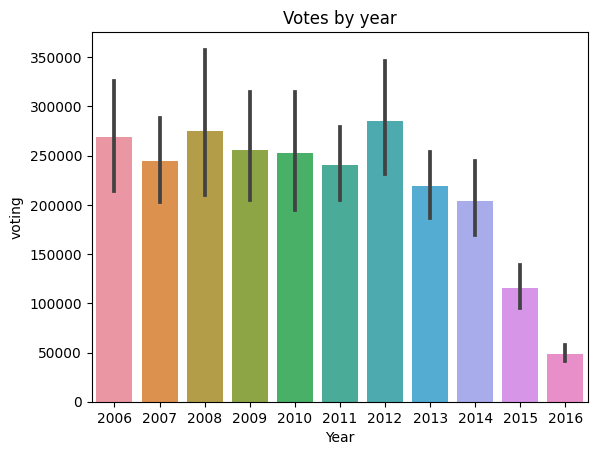

In [20]:
sns.barplot(x='Year',y='Votes',data=df)
plt.title('Votes by year')
plt.ylabel('voting')
plt.show()

**Highest Voting has been performed in the year 2012**

In [21]:
# Showing in which year there was highest avg Revenue
df.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)

Year
2012    107.973281
2009    107.533333
2010    102.226750
2008     98.100096
2011     86.983254
2013     85.831593
2007     84.871132
2006     84.555227
2014     83.564694
2015     75.007165
2016     52.613704
Name: Revenue (Millions), dtype: float64

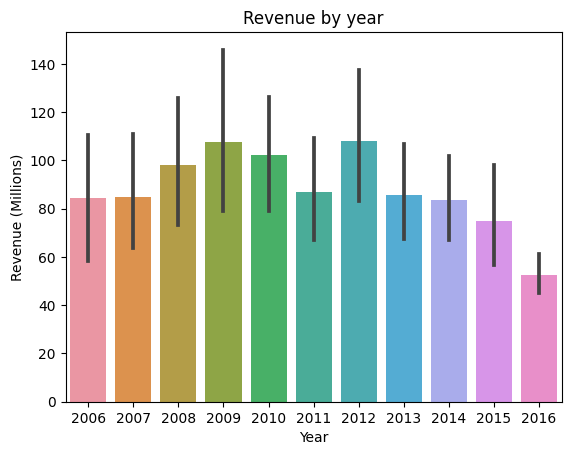

In [22]:
sns.barplot(x='Year',y='Revenue (Millions)', data=df)
plt.title('Revenue by year')
plt.show()

**2012 is having the highest revenue**

In [23]:
# avg rating for each director
df.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Nitesh Tiwari        8.80
Christopher Nolan    8.68
Olivier Nakache      8.60
Makoto Shinkai       8.60
Aamir Khan           8.50
                     ... 
Micheal Bafaro       3.50
Jonathan Holbrook    3.20
Shawn Burkett        2.70
James Wong           2.70
Jason Friedberg      1.90
Name: Rating, Length: 644, dtype: float64

In [24]:
#count of movies made by each director
df['Director'].value_counts()

Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
                     ..
Lee Toland Krieger    1
Gillies MacKinnon     1
Peter Atencio         1
James Mangold         1
Scot Armstrong        1
Name: Director, Length: 644, dtype: int64

TOP 10 LENGTHY MOVIES

In [25]:
top10 = df.sort_values(by='Runtime (Minutes)',ascending=False)[['Title','Runtime (Minutes)']].head(10)
top10

,Title,Runtime (Minutes)
828,Grindhouse,191
88,The Hateful Eight,187
965,Inland Empire,180
311,La vie d'Adèle,180
82,The Wolf of Wall Street,180
267,Cloud Atlas,172
430,3 Idiots,170
75,Pirates of the Caribbean: At World's End,169
271,The Hobbit: An Unexpected Journey,169
36,Interstellar,169


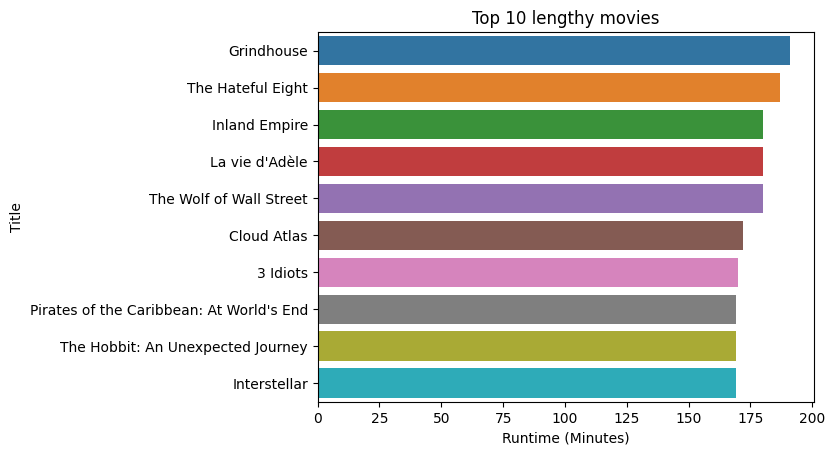

In [26]:
sns.barplot(x='Runtime (Minutes)', y='Title', data=top10)
plt.title('Top 10 lengthy movies')
plt.show()

The Grindhouse is the most lengthy movie with runtime of 191 minutes

In [27]:
# No. of movies each year
df['Year'].value_counts()

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

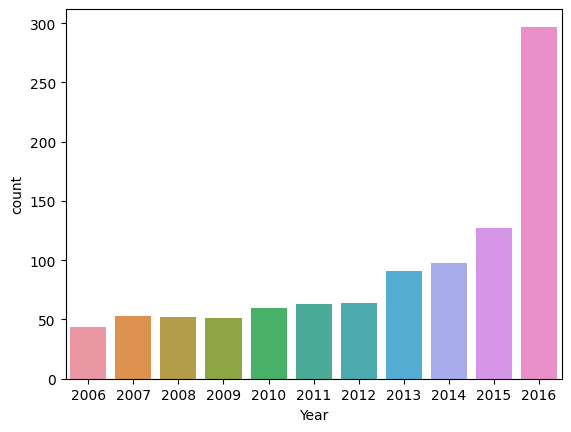

In [28]:
sns.countplot(x='Year',data=df)
plt.show()

2016 is the year with the highest no. of releases

Some quick insights :

*   2012 is the year with highest revenue of approximately 108 Millions
*   The Grindhouse is the most lengthy movie with runtime of 191 minutes
*   Highest voting has been performed is 2,85,226 in the year 2012


In [29]:
# most popular movie in terms of revenue generated
df.sort_values(by='Revenue (Millions)', ascending=False)['Title'].head(1)

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

In [30]:
# top 10 movies and the associated director based on rating
top10M = df.sort_values(by='Rating',ascending=False).head(10)[['Title','Director','Rating']]
top10M

,Title,Director,Rating
54,The Dark Knight,Christopher Nolan,9.0
80,Inception,Christopher Nolan,8.8
117,Dangal,Nitesh Tiwari,8.8
36,Interstellar,Christopher Nolan,8.6
96,Kimi no na wa,Makoto Shinkai,8.6
249,The Intouchables,Olivier Nakache,8.6
133,Whiplash,Damien Chazelle,8.5
64,The Prestige,Christopher Nolan,8.5
99,The Departed,Martin Scorsese,8.5
991,Taare Zameen Par,Aamir Khan,8.5


<Axes: xlabel='Rating', ylabel='Title'>

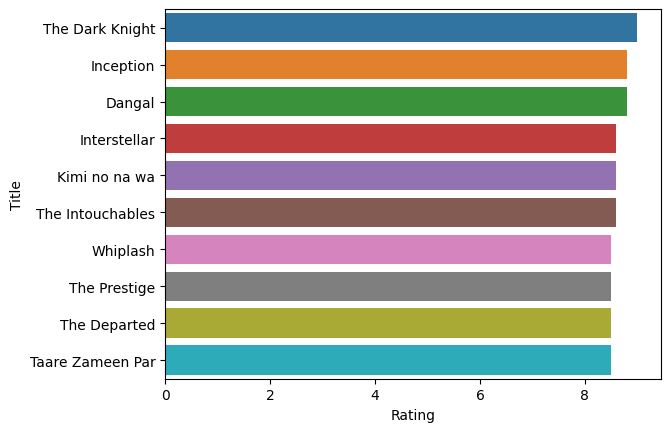

In [31]:
sns.barplot(x='Rating',y='Title',data=top10M)

Above graph is depicting top 10 highest rated movies where Dark Knight is most highest rated with 9.0 rating

<Axes: xlabel='Rating', ylabel='Title'>

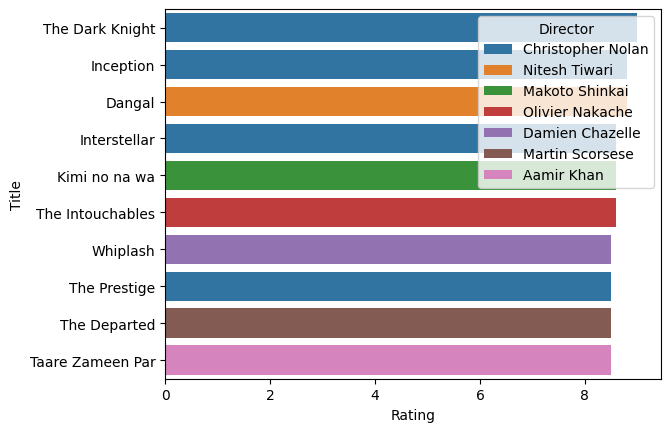

In [32]:
sns.barplot(x='Rating',y='Title',data=top10M,hue='Director',dodge=False)

*Above Graph depicts top 10 highest rated movies with its director . Point-to-note : 3 movies of Christopher Nolan are in top-5*

In [35]:
# top 10 highest revenue movie titles
top10R = df.sort_values(by='Revenue (Millions)', ascending=False)[['Revenue (Millions)','Title']].head(10).set_index('Title')
top10R
# df.nlargest(10,'Revenue (Millions)')['Title']

,Revenue (Millions)
Title,
Star Wars: Episode VII - The Force Awakens,936.63
Avatar,760.51
Jurassic World,652.18
The Avengers,623.28
The Dark Knight,533.32
Rogue One,532.17
Finding Dory,486.29
Avengers: Age of Ultron,458.99
The Dark Knight Rises,448.13


<Axes: xlabel='Revenue (Millions)', ylabel='Title'>

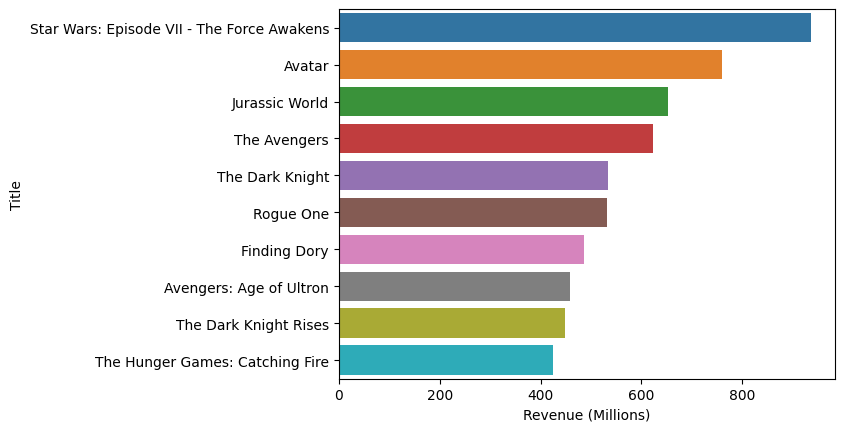

In [38]:
sns.barplot(x='Revenue (Millions)' , y=top10R.index, data= top10R)

Above Bar Graph is visual representation of top-10 highest revenue generating movies. Star Wars has topped the list with 936.63 millions

In [40]:
#avg rating of movies year-wise
df.groupby('Year')['Rating'].mean().sort_values(ascending=False)

Year
2007    7.133962
2006    7.125000
2009    6.960784
2012    6.925000
2011    6.838095
2014    6.837755
2010    6.826667
2013    6.812088
2008    6.784615
2015    6.602362
2016    6.436700
Name: Rating, dtype: float64

In [67]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

<ipython-input-71-2ff4b6b7ab08>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Rating',y='Revenue (Millions)',data=df,palette='muted')


<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

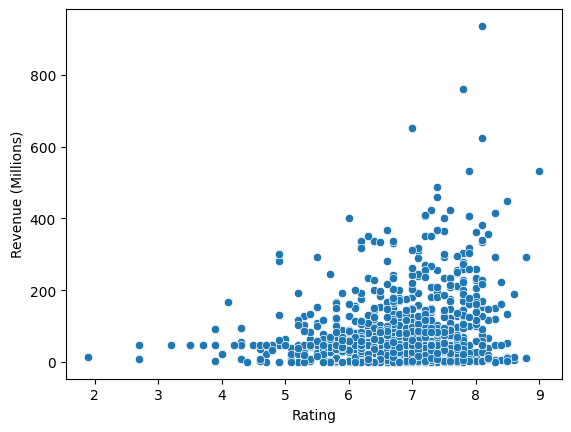

In [71]:
# Does the rating affect the revenue 

sns.scatterplot(x='Rating',y='Revenue (Millions)',data=df,palette='muted')

**Above plot is depicting the relationship between Rating & Revenue and it's visible that rating is severly affecting revenue**